"""
Created on Sat May 28 13:22:02 2022
@title: Low-pass FIR Boxcar (Moving Average) Filter using Window & Low-pass IIR Elliptic Filter
@author: LayCodes
"""

In [1]:
import scipy.signal as dsp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.fft as sfft

In [2]:
#
fc1 = 4000  # Cut-off Frequency (scaled 10:1)
fc2 = 10000 # Cut-off Frequency (scaled 10:1)
fc = 10000 # Cut-off Frequency (scaled 10:1)  => we will use this one

ft = 1000  # Transition Frequency (scaled 10:1)
rp = 0.1    # pass band
rs = 45   # stop band

fs = 44100 # Hz
Nyquist = fs/2

w = fc/(Nyquist)         

M = int(11*fs/(fc1)) # order of the FIR filter

if M % 2 == 0:
    M += 1

In [3]:
plt.close('all')

Text(0.5, 0, 'Sample')

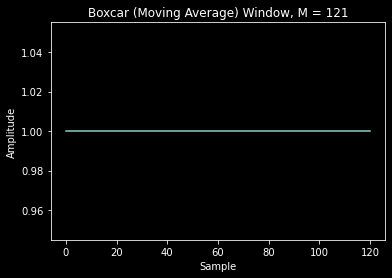

In [4]:
#
window = dsp.windows.boxcar(M)
style.use('dark_background')
plt.plot(window)
plt.title("Boxcar (Moving Average) Window, M = " + str(M))
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0, 0.5, 'Filter Gain')

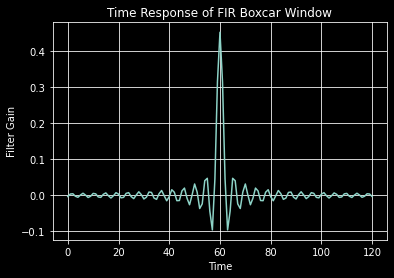

In [5]:
# Generating FIR filter kernel 
b = dsp.firwin(M, fc, fs = fs, window = ('boxcar'), pass_zero = 'lowpass')
plt.figure()
plt.grid('on')
plt.title('Time Response of FIR Boxcar Window')
style.use('dark_background')
plt.plot(b)
plt.xlabel('Time')
plt.ylabel('Filter Gain')

Text(0.5, 1.0, 'Frequency Response of LP IIR Elliptic, N = 7')

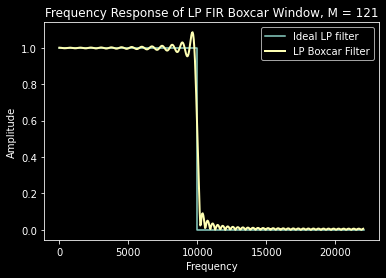

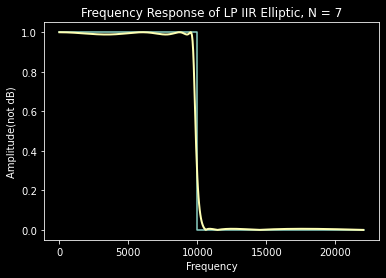

In [6]:
# Evaluating Filter in Frequency Domain

#Ideal transfer function
plt.figure()
style.use('dark_background')
plt.plot([0, fc, fc, Nyquist], [1, 1, 0, 0], label = 'Ideal LP filter') #filter gain pts
f, H = dsp.freqz(b, a = 1, fs = fs)

# plot frequency domain
plt.plot(f, np.abs(H), linewidth = 2, label = 'LP Boxcar Filter')

# plt.grid('on')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Response of LP FIR Boxcar Window, M = ' + str(M))
plt.legend()

# IIR Filter using Elliptic
wp=(fc+ft)/(fs/2)
ws=(fc-ft)/(fs/2)

Wn = 0.435 # Best estimated value

N, w=dsp.ellipord(wp=wp, ws=ws, gpass=rp, gstop=rs, fs=fs)
b,a=dsp.ellip(N,rp, rs, Wn, btype='lowpass')

f, H=dsp.freqz(b,a,fs=fs)

plt.figure()
plt.plot([0, fc, fc, Nyquist], [1,1,0,0], label = 'Ideal LP filter') #filter gain pts
plt.plot(f,np.abs(H), linewidth = 2, label = 'LP Elliptic Filter')
# plt.grid('on')

plt.xlabel('Frequency')
plt.ylabel('Amplitude(not dB)')
plt.title('Frequency Response of LP IIR Elliptic, N = '+str(N))

In [ ]:
# Scaled Evaluation (10:1)

#Ideal transfer function
plt.figure()
plt.plot([0, fc, fc, Nyquist], [1,1,0,0], label = 'Ideal filter') #filter gain pts
plt.axis([fc-ft, fc+ft, 0.0, 1.1])
plt.plot([fc-ft/2, fc-ft/2], [0,2], 'w', label = 'Transition interval')
plt.plot([fc+ft/2, fc+ft/2], [0,2], 'w')

# Generate FIR filter 
b = dsp.firwin(M, fc, fs = fs, window = ('boxcar'), pass_zero = 'lowpass')

f, H = dsp.freqz(b, a = 1, fs = fs) # Filter coefficient

# plot frequency domain
plt.plot(f, np.abs(H), label = 'Actual filter')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Response of FIR Boxcar Window (Zoomed), M = ' + str(M))
plt.legend()

Text(0, 0.5, 'Amplitude')

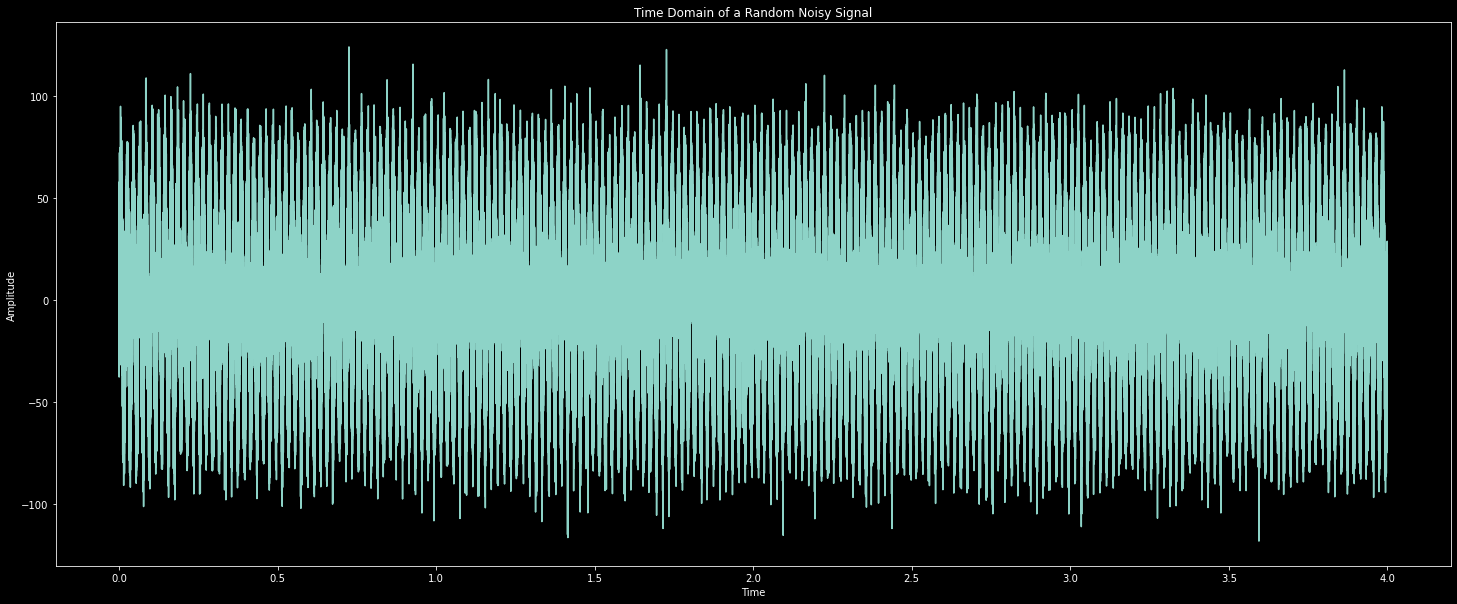

In [8]:
# Generate a random noisy signal
t = np.arange(0, 4, 1/fs)
pnts = len(t)
x = 40 * np.sin(2*np.pi*50*t)
noise = 20 * np.random.randn(pnts)
Nsignal = x + noise
plt.figure(figsize = (25,10))
plt.plot(t, Nsignal, label = 'Signal')
style.use('dark_background')
plt.title('Time Domain of a Random Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0.5, 1.0, 'Time Domain of of Random Noisy Signal filtered with LP FIR Boxcar Window')

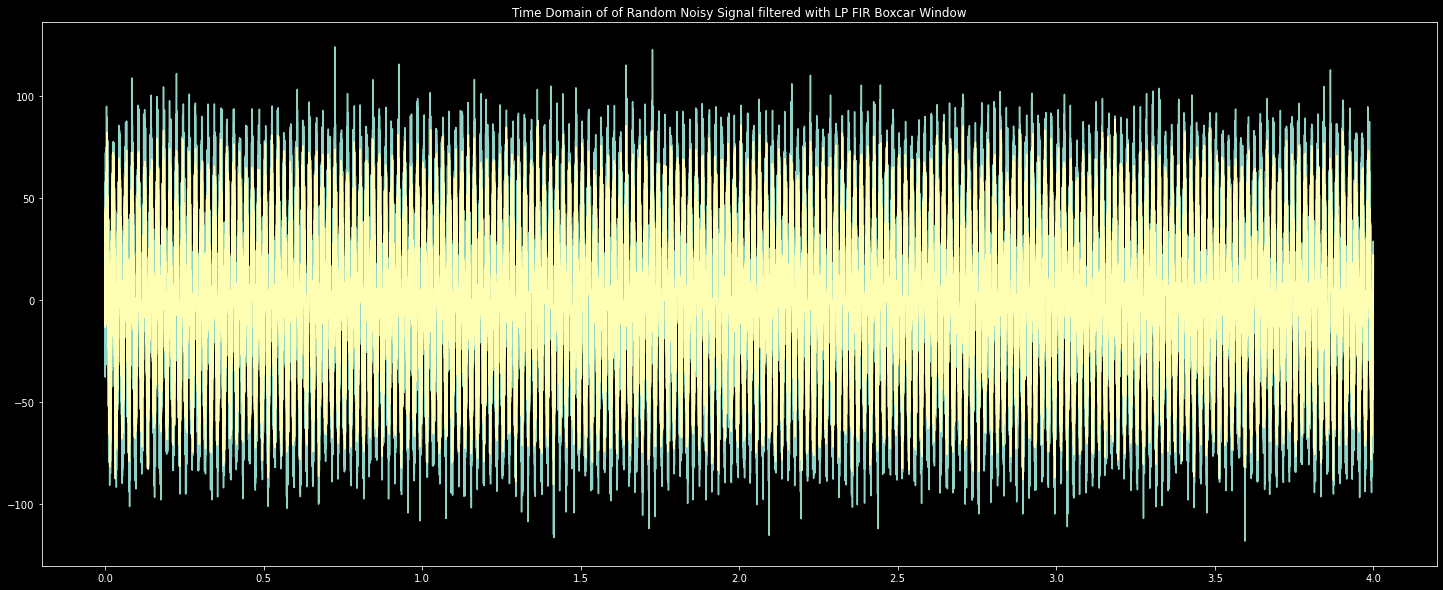

In [9]:
Hz = np.linspace(0, Nyquist, int(np.floor(pnts/2)+1))

# Applying filter in time domain
filtSig = dsp.filtfilt(b, a = 1, x = Nsignal)
plt.figure(figsize = (25,10))
style.use('dark_background')
plt.plot(t, Nsignal, label = 'Original')
plt.plot(t, filtSig, label = 'Filtered')
plt.title('Time Domain of of Random Noisy Signal filtered with LP FIR Boxcar Window')

(-0.01, 0.03)

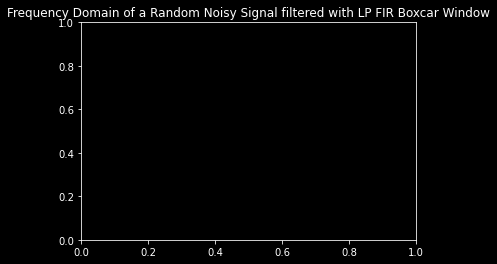

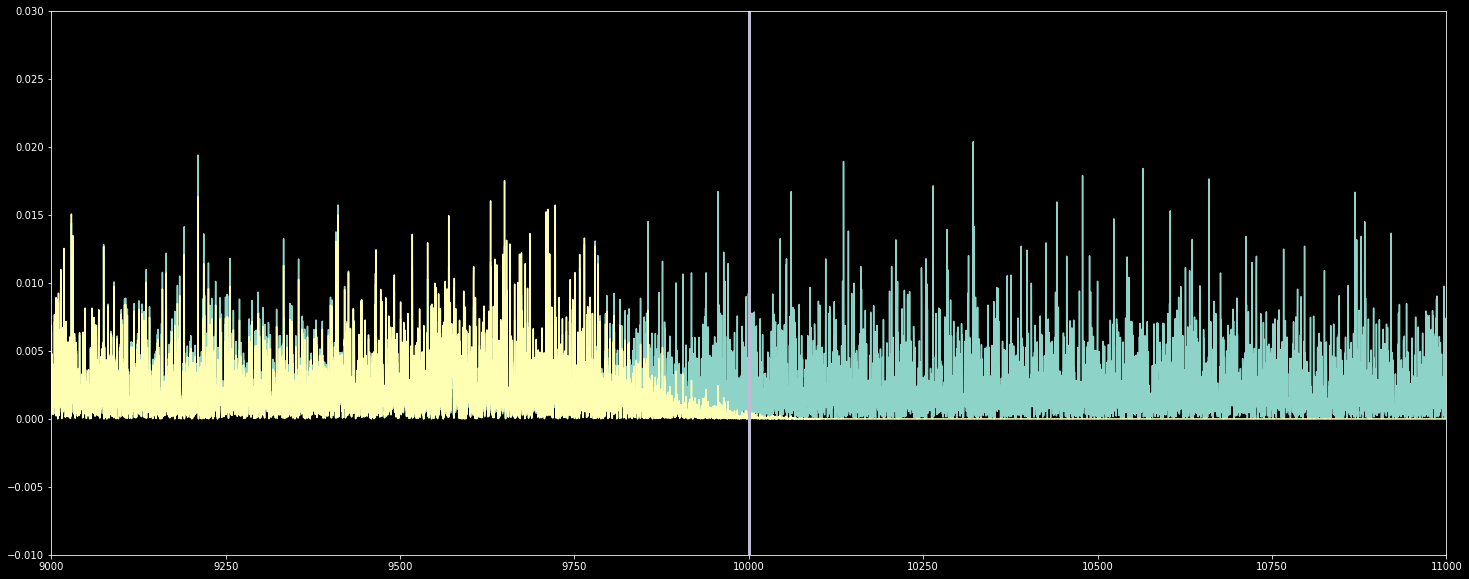

In [10]:
# Applying filter in Frequency domain
plt.title('Frequency Domain of a Random Noisy Signal filtered with LP FIR Boxcar Window')
NsignalX = np.abs(sfft.fft(Nsignal)/pnts) ** 2
filtSigX = np.abs(sfft.fft(filtSig)/pnts) ** 2
plt.figure(figsize = (25,10))

plt.plot(Hz, NsignalX[0:len(Hz)], label = 'Signal')
plt.plot(Hz, filtSigX[0:len(Hz)], label = 'Filtered at cut-off' + str(fc))
plt.plot([fc, fc],[-1, 1], linewidth = 3, label = 'Cut-off Frequency')


plt.xlim([fc-ft, fc+ft])
plt.ylim([-0.01,0.03])